#### **Data loading and pre-processing**

In [10]:
# Importing model building libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 1: Data Loading and Preprocessing
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def preprocess_data(data):
    # Handling missing values (if any)
    data.dropna(inplace=True)
    
    # Convert categorical variables to numerical (if needed) using encoding methods (e.g., one-hot encoding).
    data = pd.get_dummies(data, drop_first=True)
    
    return data

# Load the dataset
file_path = 'X:\Internship\INTERNSAVY-s_TASK\Task-1\graduate-admissions\clean_data.csv'  
data = load_data(file_path)

# Preprocess the data
data = preprocess_data(data)

# Separate the features (X) and target variable (y)
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

#### **Model Building and Evaluation**

In [11]:

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Initialize the regression models
linear_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

models = [linear_reg, knn_reg, dt_reg, rf_reg, gb_reg, xgb_reg]
model_names = ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mse_scores = []
r2_scores = []

# Train and evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    mse, r2 = evaluate_model(model, X_test_scaled, y_test)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"{name}:")
    print(f"MSE: {mse:.4f}, R2 Score: {r2:.4f}\n")

# Create a performance table
performance_table = pd.DataFrame({'Model': model_names, 'MSE': mse_scores, 'R2 Score': r2_scores})
print("Performance Table:")
print(performance_table)

# Choose the best model based on R2 Score
best_model_idx = performance_table['R2 Score'].idxmax()
best_model = models[best_model_idx]
best_model_name = model_names[best_model_idx]

print(f"\nBest Model: {best_model_name}")


Linear Regression:
MSE: 0.0037, R2 Score: 0.8188

KNN Regressor:
MSE: 0.0045, R2 Score: 0.7802

Decision Tree:
MSE: 0.0084, R2 Score: 0.5889

Random Forest:
MSE: 0.0042, R2 Score: 0.7947

Gradient Boosting:
MSE: 0.0045, R2 Score: 0.7808

XGBoost:
MSE: 0.0050, R2 Score: 0.7566

Performance Table:
               Model       MSE  R2 Score
0  Linear Regression  0.003705  0.818843
1      KNN Regressor  0.004495  0.780209
2      Decision Tree  0.008406  0.588949
3      Random Forest  0.004198  0.794743
4  Gradient Boosting  0.004482  0.780811
5            XGBoost  0.004978  0.756600

Best Model: Linear Regression


In [18]:
best_model

LinearRegression()

---

#### **Plotting Feature Importance**

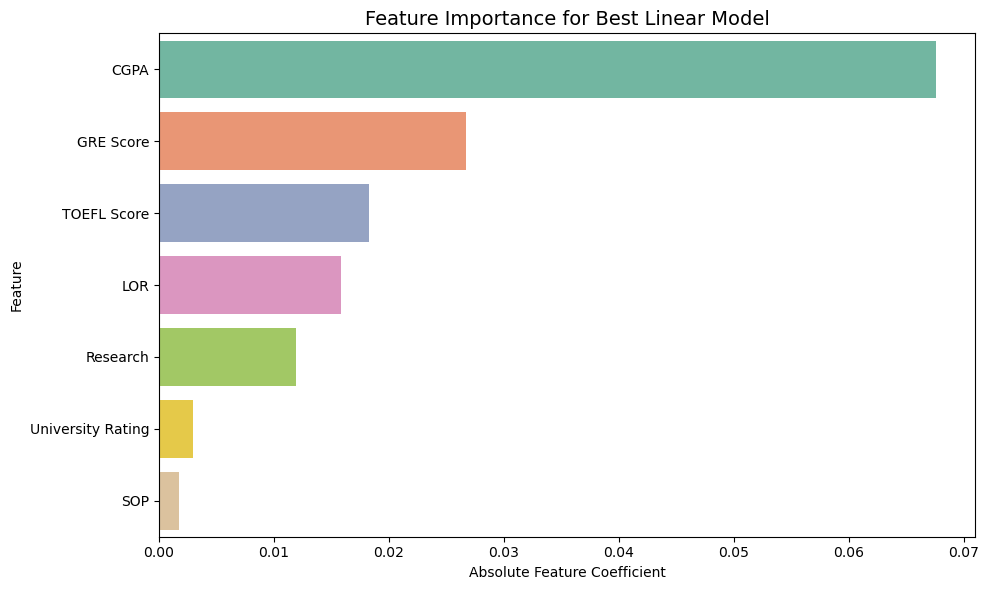

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Checks if the best_model is a tree-based model (e.g., Random Forest, Gradient Boosting)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    # Get the names of the features from the original dataset
    feature_names = data.drop('Chance of Admit', axis=1).columns

    # Create a DataFrame to store feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort the features based on importance scores (in descending order)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Use a vibrant color palette from Seaborn
    colors = sns.color_palette('Set2')

    # Plot the feature importances using a horizontal bar plot with the selected color palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Best Model')
    plt.tight_layout()
    plt.show()

# Checks if the best_model is a linear model (e.g., Linear Regression)
elif hasattr(best_model, 'coef_'):
    feature_importance = np.abs(best_model.coef_)
    # Get the names of the features from the original dataset
    feature_names = data.drop('Chance of Admit', axis=1).columns

    # Create a DataFrame to store feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort the features based on importance scores (in descending order)
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Use a vibrant color palette from Seaborn
    colors = sns.color_palette('Set2')

    # Plot the feature importances using a horizontal bar plot with the selected color palette
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
    plt.xlabel('Absolute Feature Coefficient')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Best Linear Model', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances/coefficients are not available for the selected model.")


#### **Hyperparameter Tuning for the Best Model**

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for the best model (Gradient Boosting in this case)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_model_tuned = grid_search.best_estimator_
best_model_name_tuned = f"Tuned {best_model_name}"

# Evaluate the tuned model on the test set
mse_tuned, r2_tuned = evaluate_model(best_model_tuned, X_test_scaled, y_test)
print(f"Tuned {best_model_name}:")
print(f"MSE: {mse_tuned:.4f}, R2 Score: {r2_tuned:.4f}")


In [23]:
# Hyperparameter Tuning for the Best Model (Linear Regression)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameter grid for the linear regression model
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Initialize the linear regression model
linear_regression_model = LinearRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(linear_regression_model, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best linear regression model from the grid search
best_model_tuned = grid_search.best_estimator_
best_model_name_tuned = "Tuned Linear Regression"

# Evaluate the tuned model on the test set
mse_tuned, r2_tuned = evaluate_model(best_model_tuned, X_test_scaled, y_test)
print(f"Tuned Linear Regression:")
print(f"MSE: {mse_tuned:.4f}, R2 Score: {r2_tuned:.4f}")


Tuned Linear Regression:
MSE: 0.0037, R2 Score: 0.8188


---

### **Model Evaluation**

In [ ]:
# Step 4: Model Evaluation with User Input

def predict_admission_chance(model, scaler):
    print("Please provide the following inputs:")
    gre_score = float(input("GRE Score: "))
    toefl_score = float(input("TOEFL Score: "))
    university_rating = float(input("University Rating: "))
    sop = float(input("Statement of Purpose (SOP) Score: "))
    lor = float(input("Letter of Recommendation (LOR) Score: "))
    cgpa = float(input("CGPA: "))
    research = int(input("Research (0 for No, 1 for Yes): "))
    
    user_input = pd.DataFrame({
        'GRE Score': [gre_score],
        'TOEFL Score': [toefl_score],
        'University Rating': [university_rating],
        'SOP': [sop],
        'LOR': [lor],
        'CGPA': [cgpa],
        'Research': [research]
    })
    
    # Scale the user input using the same scaler used for training data
    user_input_scaled = scaler.transform(user_input)
    
    # Make prediction
    admission_chance = model.predict(user_input_scaled)[0]
    print(f"\nPredicted Chance of Admit: {admission_chance:.4f}")

# Use the tuned model for prediction
predict_admission_chance(best_model_tuned, scaler)
